In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv("codes/FixationFinalcsv.csv")
# df.replace(['.'], 'NaN')
dfless = df[df["CURRENT_FIX_NEAREST_INTEREST_AREA_DISTANCE"]<6]

df.head()

,RECORDING_SESSION_LABEL,TRIAL_INDEX,CURRENT_FIX_NEAREST_INTEREST_AREA,CURRENT_FIX_DURATION,CURRENT_FIX_END,CURRENT_FIX_END_OTHER,CURRENT_FIX_INDEX,CURRENT_FIX_INPUT_EVENTS,CURRENT_FIX_INTEREST_AREAS,CURRENT_FIX_INTEREST_AREA_DATA,...,img_width,language,monolingual_location,monolinguals,position_index,probe,serial,spoken_language,spoken_word,trial_type
0,aditi,1,1,61,2584,.,1,[],[ ],.,...,250,L1 - L2,1,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",125.wav,26,Hindi,beggar.bmp,Expt
1,aditi,1,1,450,3224,.,2,[],[ ],.,...,250,L1 - L2,1,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",125.wav,26,Hindi,beggar.bmp,Expt
2,aditi,1,1,584,3847,.,3,[],[ ],.,...,250,L1 - L2,1,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",125.wav,26,Hindi,beggar.bmp,Expt
3,aditi,1,1,211,4151,.,4,[],[ ],.,...,250,L1 - L2,1,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",125.wav,26,Hindi,beggar.bmp,Expt
4,aditi,1,1,97,4529,.,5,[],[ ],.,...,250,L1 - L2,1,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",125.wav,26,Hindi,beggar.bmp,Expt


In [5]:
dfless["CURRENT_FIX_INTEREST_AREA_LABEL"].replace(['monolingual_interest_area'], 0,inplace=True)
dfless["CURRENT_FIX_INTEREST_AREA_LABEL"].replace(['bilingual_interest_area'], 1,inplace=True)
dfless["condition"].replace(['Baseline'],1,inplace=True)
dfless["condition"].replace(['Conditioned'],2,inplace=True)
dfless["spoken_language"].replace(['Hindi'],1,inplace=True)
dfless["spoken_language"].replace(['English'],2,inplace=True)

new_df=dfless.reset_index()
new_df.drop(['index'],axis=1,inplace=True)
new_df.head()

/Users/admin/opt/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,RECORDING_SESSION_LABEL,TRIAL_INDEX,CURRENT_FIX_NEAREST_INTEREST_AREA,CURRENT_FIX_DURATION,CURRENT_FIX_END,CURRENT_FIX_END_OTHER,CURRENT_FIX_INDEX,CURRENT_FIX_INPUT_EVENTS,CURRENT_FIX_INTEREST_AREAS,CURRENT_FIX_INTEREST_AREA_DATA,...,img_width,language,monolingual_location,monolinguals,position_index,probe,serial,spoken_language,spoken_word,trial_type
0,aditi,2,1,99,2536,.,1,[],"[ 1, 3]","[STATIC, RECTANGLE, 752.0, 200.0, 1152.0, 800.0]",...,250,L1 - L2,2,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",105.wav,133,1,soap.bmp,Expt
1,aditi,2,1,319,2864,.,2,[],"[ 1, 3]","[STATIC, RECTANGLE, 752.0, 200.0, 1152.0, 800.0]",...,250,L1 - L2,2,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",105.wav,133,1,soap.bmp,Expt
2,aditi,2,2,525,4029,.,4,[],"[ 2, 4]","[STATIC, RECTANGLE, 150.0, 200.0, 550.0, 800.0]",...,250,L1 - L2,2,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",105.wav,133,1,soap.bmp,Expt
3,aditi,3,2,463,2898,.,1,[],"[ 2, 4]","[STATIC, RECTANGLE, 150.0, 200.0, 550.0, 800.0]",...,250,L1 - L2,2,Monolingual_M.png,"[(0, 0), (350, 500), (952, 500)]",126.wav,27,1,candle.bmp,Expt
4,aditi,4,1,283,2719,.,1,[],"[ 1, 3]","[STATIC, RECTANGLE, 752.0, 200.0, 1152.0, 800.0]",...,250,L1 - L2,2,Neutral_M.png,"[(0, 0), (350, 500), (952, 500)]",137.wav,36,1,almond.bmp,Expt


In [7]:
#clearing the data
language = new_df["spoken_language"]
condition = new_df["condition"]
interaction = new_df[["spoken_language","condition"]]
dependent_var = new_df["CURRENT_FIX_INTEREST_AREA_LABEL"]
df_all = new_df[["spoken_language","condition","CURRENT_FIX_INTEREST_AREA_ID"]]
# print([CURRENT_FIX_INTEREST_AREA_LABE])


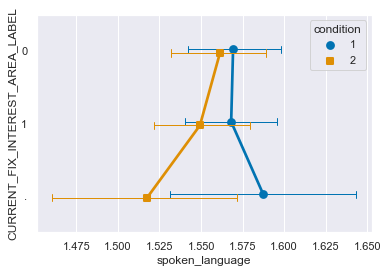

In [8]:
import seaborn as sns
sns.set()
sns.pointplot(data=df_all, x=language, y=dependent_var, hue=condition, dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [9]:
import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# x_inc = new_df[["condition"]]
# # x_inc = sm.add_constant(x_inc)
# y_var = new_df[["CURRENT_FIX_NEAREST_INTEREST_AREA"]]
# print(y_var)
# # x_train, x_test, y_train, ytest = train_test_split(x_inc, y_var, train_size=0.7, random_state=2 )


In [10]:
logit_inc = sm.Logit(dependent_var,interaction)
result = logit_inc.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).